# 12장 Random Forests Classifier (랜덤 포레스트)
---
- Dates : Sep 04, 2024  
- Author : JaeEun Yoo
---

## 랜덤 포레스트란?
- 앙상블(Ensemble) 학습 방법 중 하나로, 여러 개의 Decision tree를 조합하여 만든 알고리즘
- 앙상블 학습 : 여러 개의 기본 학습 모델을 조합하여 더 강력한 모델을 만드는 기법
- 분류 및 회귀 문제에 모두 사용 가능함


### 앙상블(Ensemble) 학습의 주요 기법들
#### 1. 보팅(Voting)  
- 여러 개의 다른 종류의 기본 모델들의 예측을 결합하는 가장 간단한 형태의 앙상블 학습 (같은 데이터를 다른 모델들로 예측)
- 하드 보팅(Hard Voting): 각 모델의 예측 결과를 투표로 취합하여 **가장 많은 표**를 얻은 결과를 최종 예측값으로 사용
- 소프트 보팅(Soft Voting): 각 모델의 예측 확률을 **평균내어, 가장 높은 확률**을 가진 결과를 최종 예측값으로 사용

#### 2. 배깅(Bagging)
- 'Bootstrap Aggregating'의 줄임말
- 원본 데이터셋으로부터 랜덤하게 샘플을 여러 번 추출하여(Bootstrap), 각 샘플로 모델을 개별적으로 학습시킨 후, 이들의 결과를 취합(Aggregating)하는 기법
- 대표적인 알고리즘으로는 **랜덤 포레스트(Random Forest)**

#### 3. 부스팅(Boosting)
- 여러 개의 약한 모델(Weak Learners)을 순차적으로 학습시켜, 이전 모델의 오류를 개선하는 방식
- 약한 모델들을 점진적으로 강화하여 하나의 강력한 모델로 만들어 나감 (AdaBoost, Gradient Boosting, XGBoost, LightGBM 등)


![numpy array 01](./figures/rf_01.png)

**랜덤포레스트는 변수를 랜덤하게 선택하는 과정에서 개별 나무들의 상관성을 줄여 예측력을 향상시킴!**

### 배깅 (Bagging)

![numpy array 01](./figures/rf_02.png)

- bagging은 트리를 만들 때 training set의 부분 집합을 활용하여 형성
- training set에 100개의 데이터가 존재한다면, 각 트리를 생성할 때 10개의 데이터만 임의로 선택하여 트리를 만드는데 활용
- 이렇게 데이터를 임의로 선택할 때  중복을 허용함으로써 100개의 데이터 중에서 10개만 뽑기보다는 10개씩 매번 뽑아도 독특한 데이터셋을 형성할 수 있게되고, 이에 따라 다양한 트리가 생성될 수 있게 됨
- 이렇게 생성된 데이터들은 각 결정트리로 들어가며 결정 트리 분류 과정은 11장과 동일함

<br> 

- 랜덤 포레스트는 트리를 형성할 때 데이터 셋에만 변화를 주는 것이 아닌 feature를 선택하는데도 변화를 줌
- feature를 선택할 때도 기존에 존재하는 feature의 부분집합을 활용. 

### 랜덤 포레스트 작동 원리

1) 부트스트랩 샘플링(Bootstrap Sampling): 원본 데이터셋에서 랜덤하게 샘플을 여러 번 추출(이 때, 샘플은 중복 추출이 가능함)
2) 특성 무작위 선택: 각 의사결정나무를 학습시킬 때, 모든 특성을 사용하는 것이 아니라 일부 특성만 무작위로 선택하여 학습 -> 의사결정나무들 사이의 상관관계를 줄이고, 다양성을 증가. (이 때, 특성은 전체 특성의 제곱근의 수 만큼 부트스트랩 샘플링하여 선택함)
3) 나무 생성: 각각의 부트스트랩 샘플과 무작위로 선택된 특성을 사용하여 의사결정나무를 학습시킴
4) 결과 취합: 모든 의사결정나무의 예측을 취합하여, 가장 많이 등장하는 클래스(분류) 또는 평균(회귀)을 최종 예측 결과로 사용


---
## 실습 : 키와 몸무게로 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



In [2]:
# Height, Weight
X_train = np.array([[150,50], [161.1, 55], [168,70], [172,73], [193,91], [185,74]])
y_train = np.array([0,0,1,1,2,2])

In [3]:
X_train.shape

(6, 2)

In [4]:
y_train.shape

(6,)

In [5]:
clf = RandomForestClassifier(n_estimators=10,max_depth=2)

In [6]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=10)

In [7]:
print(clf.predict([[170,60]]))

[0]


In [8]:
clf.estimators_

[DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=2072423202),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1028201822),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1843378359),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1016508666),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1725304908),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=2136634946),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1462155253),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=311027864),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1742242962),
 DecisionTreeClassifier(max_depth=2, max_features='sq

In [11]:
clff = clf.estimators_[-2]

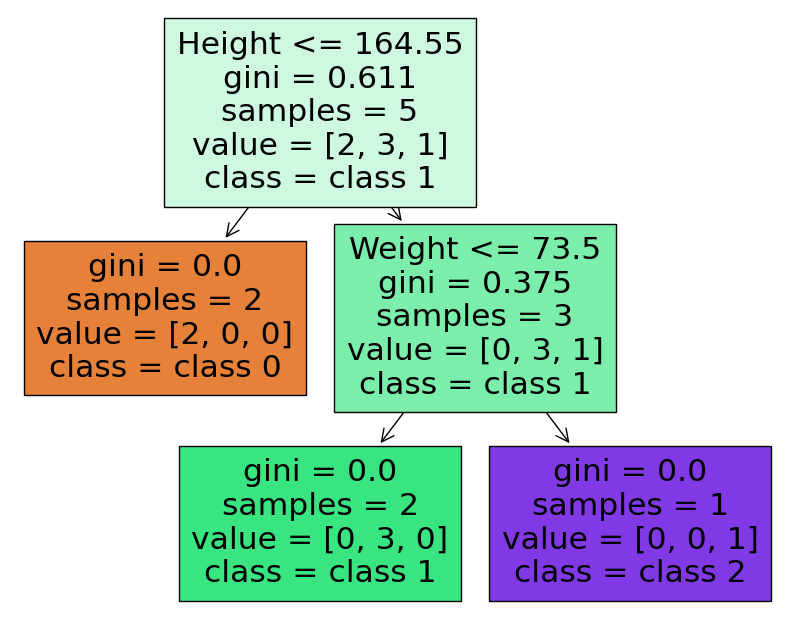

In [12]:
plt.figure(figsize=(10,8))
plot_tree(clff, filled=True, feature_names=['Height','Weight'], class_names=['class 0','class 1','class 2'])
plt.show()

> refer
- https://mozenworld.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%AA%A8%EB%8D%B8-%EC%86%8C%EA%B0%9C-4-%EB%9E%9C%EB%8D%A4-%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8-Random-Forest
- https://gsbang.tistory.com/entry/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5-%EC%95%99%EC%83%81%EB%B8%94-%ED%95%99%EC%8A%B5-%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8Random-Forest
- https://ga02-ailab.tistory.com/36
-  https://blog-ko.superb-ai.com/3-minute-algorithm-random-forest/